In [18]:
# Run some setup code for this notebook.

import random
import numpy as np
from asgn1.cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import DataUtils as du
X_train, y_train, P_train, X_val, y_val, P_val, X_test, y_test, P_test = du.loadData()

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (18927, 32, 32, 3)
Train labels shape:  (18927,)
Validation data shape:  (5375, 32, 32, 3)
Validation labels shape:  (5375,)
Test data shape:  (2682, 32, 32, 3)
Test labels shape:  (2682,)


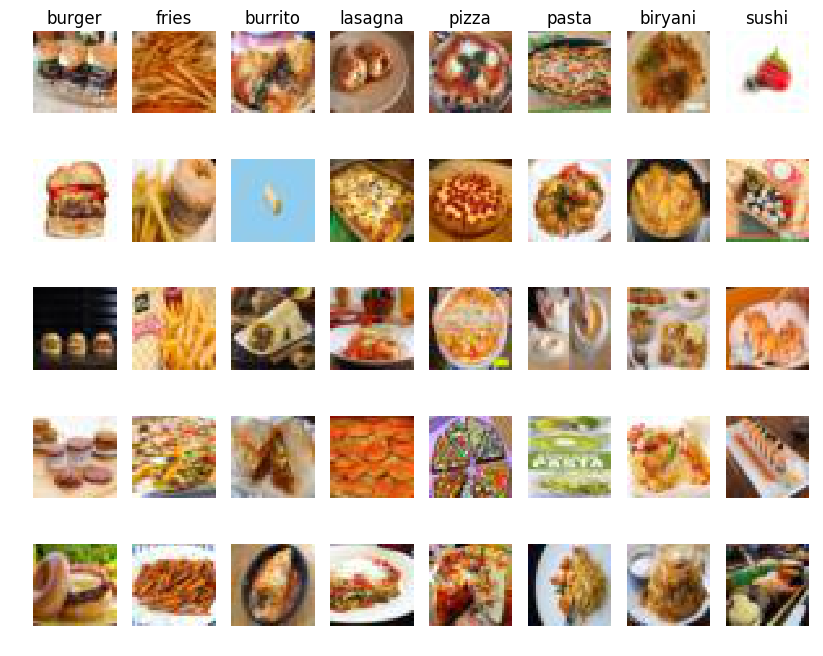

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['burger', 'fries', 'burrito', 'lasagna', 'pizza', 'pasta', 'biryani', 'sushi']
num_classes = len(classes)
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)

#plt.savefig('assets/data_vis_2.png')
plt.show()

In [4]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)

Training data shape:  (18927, 3072)
Validation data shape:  (5375, 3072)
Test data shape:  (2682, 3072)


In [5]:
from asgn1.cs231n.classifiers.neural_net import TwoLayerNet

input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 20
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

num_train : 18927
batch_size : 200
iterations_per_epoch : 94
num_iters : 1000
iteration 0 / 1000: loss 2.996111
iteration 100 / 1000: loss 2.995245
iteration 200 / 1000: loss 2.997372
iteration 300 / 1000: loss 2.993982
iteration 400 / 1000: loss 2.972343
iteration 500 / 1000: loss 2.942531
iteration 600 / 1000: loss 2.968551
iteration 700 / 1000: loss 2.931681
iteration 800 / 1000: loss 2.888982
iteration 900 / 1000: loss 2.871467
Validation accuracy:  0.123906976744


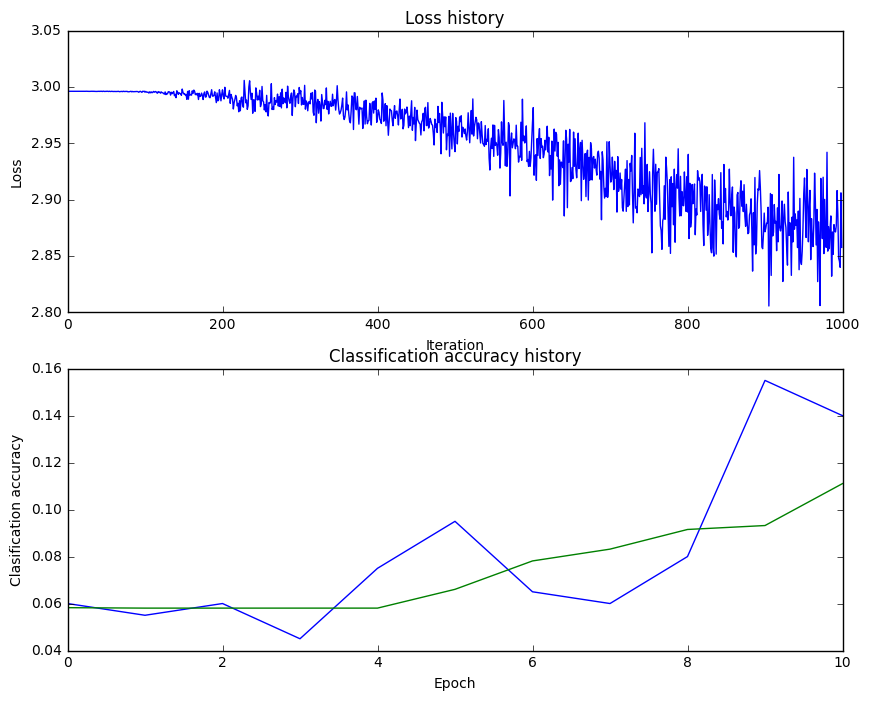

In [6]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

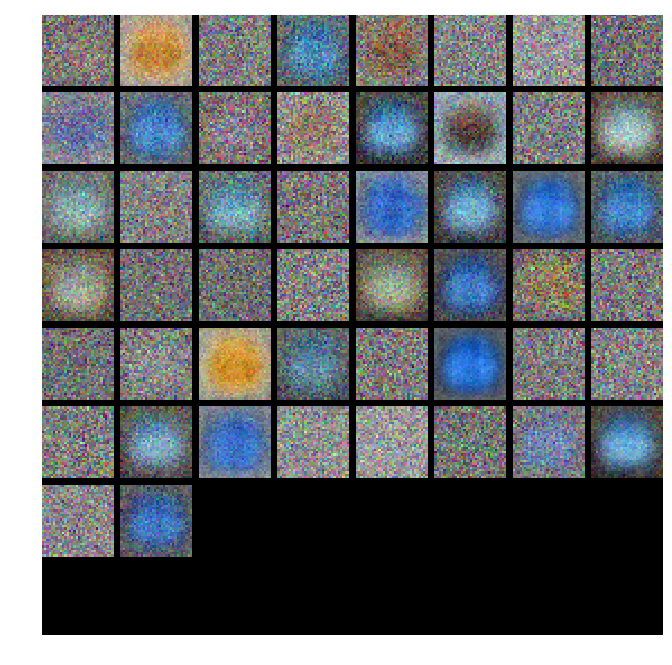

In [7]:
from asgn1.cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

In [8]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
#pass
best_val = -1   # The highest validation accuracy that we have seen so far.
best_stats = None

learning_rates = [1e-4, 1e-3, 1e-2]
regularization_strengths = [0.25, 1]
learning_rate_decay = [0.95]
hidden_sizes = [50, 100, 200, 300, 400]

for _l in learning_rates:
  for _r in regularization_strengths:
    for _d in learning_rate_decay:
      for _h in hidden_sizes:  
          
        net = TwoLayerNet(input_size, _h, num_classes)
        
        # Train the network
        stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=_l, learning_rate_decay=_d,
            reg=_r, verbose=True)

        # Predict on the validation set
        val_accuracy = (net.predict(X_val) == y_val).mean()
        print('Validation accuracy: {0}. learning rate : {1}. regularization strength : {2}. decay : {3} hidden : {4}'.format(val_accuracy, _l, _r, _d, _h))
        
        if (val_accuracy > best_val):
            best_val = val_accuracy
            best_net = net
            best_stats = stats

#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

num_train : 18927
batch_size : 200
iterations_per_epoch : 94
num_iters : 1000
iteration 0 / 1000: loss 2.996144
iteration 100 / 1000: loss 2.994980
iteration 200 / 1000: loss 2.984488
iteration 300 / 1000: loss 2.997429
iteration 400 / 1000: loss 2.975081
iteration 500 / 1000: loss 2.966778
iteration 600 / 1000: loss 2.929774
iteration 700 / 1000: loss 2.939276
iteration 800 / 1000: loss 2.877856
iteration 900 / 1000: loss 2.890428
Validation accuracy: 0.11274418604651162. learning rate : 0.0001. regularization strength : 0.25. decay : 0.95 hidden : 50
num_train : 18927
batch_size : 200
iterations_per_epoch : 94
num_iters : 1000
iteration 0 / 1000: loss 2.996586
iteration 100 / 1000: loss 2.995002
iteration 200 / 1000: loss 2.994176
iteration 300 / 1000: loss 2.996024
iteration 400 / 1000: loss 2.964354
iteration 500 / 1000: loss 2.942545
iteration 600 / 1000: loss 2.920409
iteration 700 / 1000: loss 2.900131
iteration 800 / 1000: loss 2.895302
iteration 900 / 1000: loss 2.863849
Valid

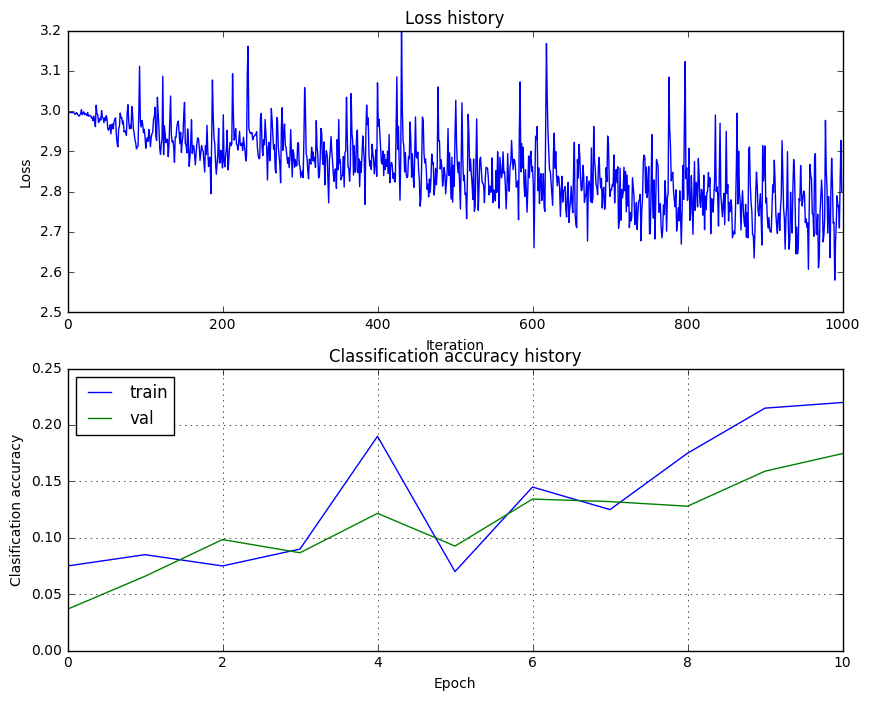

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'], label='train')
plt.plot(best_stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(True)
plt.legend(loc=0)
plt.show()

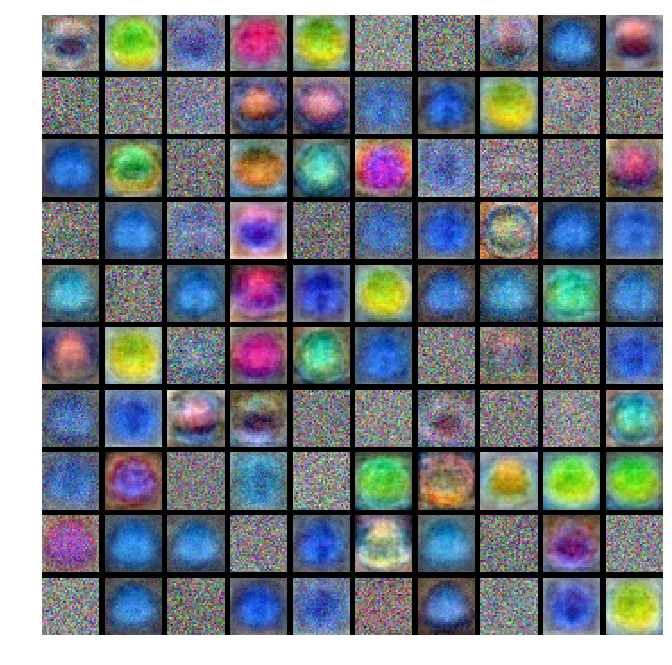

In [10]:
# visualize the weights of the best network
show_net_weights(best_net)

In [11]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.160328113348


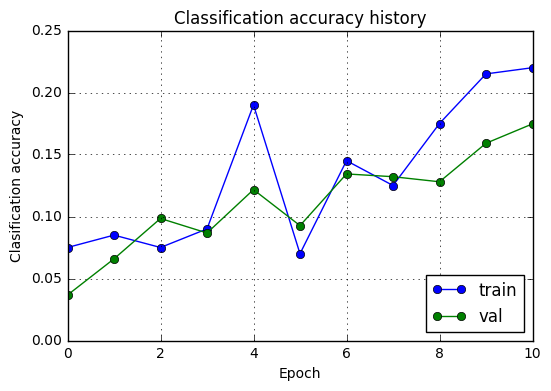

In [20]:
plt.plot(best_stats['train_acc_history'], '-o', label='train')
plt.plot(best_stats['val_acc_history'], '-o', label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig('assets/fctwolayer_rawpixels_classificationaccuracy.png')
plt.show()